# Predicting Multi-MNIST digits.

The assignment consists of three tasks:

1. A multi-class classification problem: the prediction of grayscale images of double-digit numbers from a custom version of the (Multi-)MNIST dataset.

2. Unsupervised problem: the implementation of an AutoEncoder model for the encoding and reconstruction of the provided data.

3. You can choose between (one of them is mandatory, you can choose which one to do):

*   Use latent representation of autoencoder as a feature reduction
*   Explain Neural Network predictions


The dataset is created by simply concatenating pairs of MNIST digits, and the number of classes (originally all the numbers in the [0, 100] range) has been reduced.

An example of the provided dataset is the following:

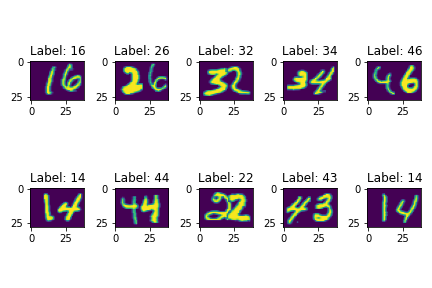

The provided data comprises the training set that can be used for the training (and for the validation) and the test set.

**General considerations**

Always describe and give proper motivations about the choices made during the assignment, including (but not limited to)

- data processing,
- network design: including number and dimension of the layers, regularization techniques (when requested).
- optimization algorithms, including hyperameters and criterions,
- model training hyperparameters
- loss/metric curves
- final evaluations and comparisons.


**Note**: Make sure that the outputs in the notebook cells are still visible once the notebook is exported (especially for html embeddings)

**Note**: Make sure that the submitted *.zip archives are not corrupted.

**Note**: convolutional layers should not be used all over this notebook (with the exception of the optional part).

## Inspecting the data

any comment about data dimensionality/distribution goes here

x_train shape: (72247, 28, 39) (Training samples, Height, Width)
y_train shape: (72247,) (Training labels)
x_test shape: (24083, 28, 39) (Test samples, Height, Width)
y_test shape: (24083,) (Test labels)

Training Class Distribution:
Label 1: 2282 samples
Label 2: 292 samples
Label 3: 2049 samples
Label 4: 1941 samples
Label 5: 1819 samples
Label 6: 641 samples
Label 7: 2102 samples
Label 8: 560 samples
Label 9: 2046 samples
Label 10: 2311 samples
Label 11: 2548 samples
Label 12: 766 samples
Label 13: 358 samples
Label 14: 634 samples
Label 15: 2055 samples
Label 16: 2214 samples
Label 17: 318 samples
Label 18: 471 samples
Label 19: 2403 samples
Label 20: 1982 samples
Label 21: 646 samples
Label 22: 2029 samples
Label 23: 2073 samples
Label 24: 413 samples
Label 25: 555 samples
Label 26: 2034 samples
Label 27: 2132 samples
Label 28: 1926 samples
Label 29: 1979 samples
Label 30: 276 samples
Label 31: 787 samples
Label 32: 832 samples
Label 33: 2159 samples
Label 34: 2050 samples
Label 3

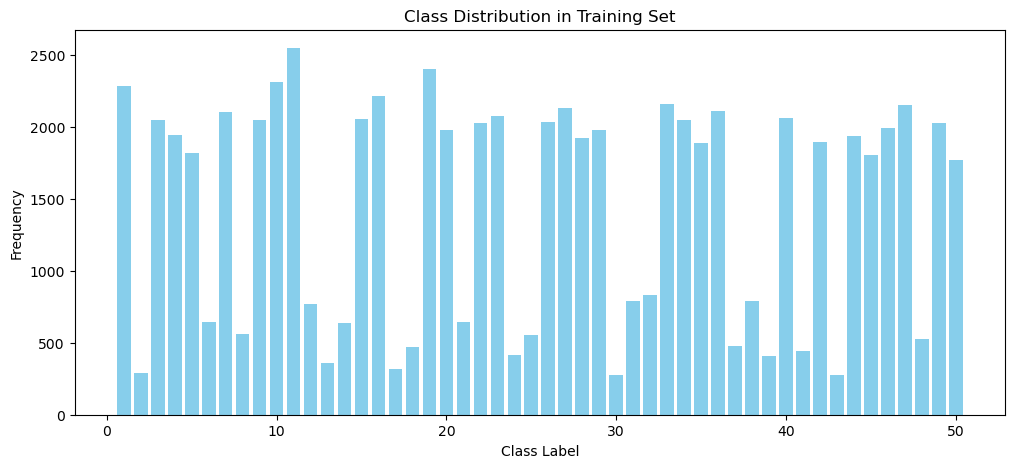


Pixel Value Statistics for Training Set:
Mean pixel value: 45.94
Standard deviation of pixel values: 86.29
Min pixel value: 0
Max pixel value: 255

Unique image shapes in the training set: {(28, 39)}

Unique labels in training set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
Number of unique labels: 50


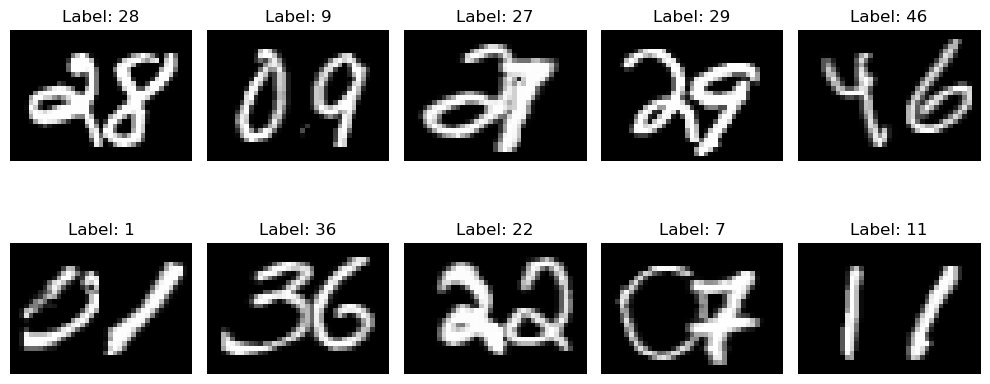

In [3]:
## Inspecting the data - Extended Analysis

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Carichiamo i dati
x_train = np.load("./x_train.npy")
x_test = np.load("./x_test.npy")
y_train = np.load("./y_train.npy")
y_test = np.load("./y_test.npy")

# Verifichiamo la forma dei dati
print(f"x_train shape: {x_train.shape} (Training samples, Height, Width)")
print(f"y_train shape: {y_train.shape} (Training labels)")
print(f"x_test shape: {x_test.shape} (Test samples, Height, Width)")
print(f"y_test shape: {y_test.shape} (Test labels)")

# 1. Distribuzione delle classi
train_class_distribution = Counter(y_train)
test_class_distribution = Counter(y_test)

print("\nTraining Class Distribution:")
for label, count in sorted(train_class_distribution.items()):
    print(f"Label {label}: {count} samples")

print("\nTest Class Distribution:")
for label, count in sorted(test_class_distribution.items()):
    print(f"Label {label}: {count} samples")

# Visualizzazione della distribuzione delle classi (training set)
plt.figure(figsize=(12, 5))
plt.bar(train_class_distribution.keys(), train_class_distribution.values(), color="skyblue")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Set")
plt.show()

# 2. Analisi statistica dei pixel
print("\nPixel Value Statistics for Training Set:")
print(f"Mean pixel value: {np.mean(x_train):.2f}")
print(f"Standard deviation of pixel values: {np.std(x_train):.2f}")
print(f"Min pixel value: {np.min(x_train)}")
print(f"Max pixel value: {np.max(x_train)}")

# 3. Dimensione delle immagini e proporzioni
unique_shapes = {img.shape for img in x_train}
print("\nUnique image shapes in the training set:", unique_shapes)

# 4. Esplorazione dei valori unici nelle etichette
unique_labels = np.unique(y_train)
print("\nUnique labels in training set:", unique_labels)
print(f"Number of unique labels: {len(unique_labels)}")

# Visualizziamo qualche esempio di immagine per ispezionare il contenuto del dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

# 1. The resolution of the problem of supervised classification with traditional fully-connected neural networks. [Mandatory]





You are required to implement two models, without and with the use of one (or more) regularization technique of your choice, and to compare their behaviours, in terms of training dynamics and generalization capabilities.

## 1.1 Non-regularized Model

In this section, you are required to attempt to solve the classification task with the implementation and training of a standard fully-connected Neural Network, without the use of any specific regularization technique.

### 1.1.1 Building the network


any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. loss/optimizer choice, final activations, loss functions, training metrics and training hyperparameters)

### 1.1.2 Analyze and comment on thetraining results

Describe, visualize and interpret the training history and the resulting training dynamics.

### 1.1.3 Validate the model and comment on the results

please describe and interpret the evaluation procedure on a **validation set**, including initial comments on the generalization capability of your model (e.g. under/overfitting).

## 1.2 Regularized Model

Replicate the structure of section 1.1 (including subsections 1.1.1, 1.1.2, 1.1.3 and guidelines), this time with the implementation and training of a regularized network.

Implement _at least_ one regularization technique of your choice.

The overall model architecture can be either identical or different with respect to the one presented in sec 1.1 (your choice).

## 1.3. Compare the performances of the two models (non-regularized and regularized) on the provided test set, visualize and comment on theresults

Visualize, describe and interpret the evaluation procedure and results on the provided test set, with a focus on the generalization capability of your models.



Based on the results obtained and analyzed during the training and the validation phases, what were your (rather _personal_) expectations with respect to the performances of your models on a blind external test set?

What are the differences between results on the validation set and the actual result on the test set (if any)? What could have caused them? Briefly motivate your answer.

After the comparison, what is the overall "best" model? Why?

For the model that you consider the "best", what are the major sources of error? Are there any classes/labels (or data samples in general) where the model is struggling the most? Why?

# 2. The development of a simple auto-encoder model  [Mandatory]
Implement a fully-connected AutoEncoder architecuture, with a **compression factor** (ratio between input size and smallest encoding size) in the **range [20-30]**.


Visually investigate the reconstruction abilities of such an architecture, e.g. comparing a few inputs and outputs (reconstructed inputs) of the model (as seen in class).

## 2.1 Building the network

note: although not strictly required, monitoring the training dynamics and performance evaluation is suggested for the autoencoder model.

## 2.2 Visually Inspecting the results

Investigate the reconstruction capabilities of autoencoders by comparing (in a multi-column plot) the visual representation of some input data (5 to 10 samples) with the reconstruction of such samples (output of the autoencoder).

## 2.3 Generate new samples

Starting from random encodings, generate $N$ ($N \in [10,20]$) new samples, and make some comments about the quality and distribution of the generated samples.

# 3.A [OPTIONAL] The use and evaluation of the latent (encoded) representations generated by the auto-encoder to solve the problem of supervised classification.

1. Obtain `X_train_encoded`, `X_test_encoded`, the latent (encoded) representations of `X_train` and `X_test` generated by the (encoder module of the) autoencoder developed in Section 2.

2. With the use of any classic machine learning method of your choice (avoid NNs), classify letters as in Sec.1 based on this representation.

3. Apply the same type of ML algorithm chosen in pt.2, but directly on the original data `X_train`, `X_test` (or you can use suitable dimensionality reduction methods if the chosen algorithm is known to require them or benefit from them).  

4. Compare (briefly) the performances on the test set, between the best model of Sec.1, the ML model trained on `X_train_encoded` and the ML model trained on `X_train` (or any other suitable representation that you choose in pt.3).


In other words, instead of feeding images directly through a classifier, you can try to use the encoded representations from the AE as input for a classic ML algorithm (XGB, SVM, RF ...) to solve the classification task.


# 3.B [OPTIONAL] Explain model's predictions

Take the networks defined in (1) and try to explain the predictions of the model.

*   Include at least one model-agnostic method and one model-specific method;
*   Compare the two investigated XAI methods;
*   Compare the results on the original and regularized model for a single XAI method;

### 3.B.1 XAI method definition

Describe the design choices made at this stage: why did you choose these two methods?

### 3.B.2 Result's comparison

Compare the results of both XAI methods and the results of applying the same method to different models.